# Fashion MNIST Image Classification using CNN
## ----------------------------------------------------------------------------------------------------------------------------------
**Fashion MNIST** is a dataset which consists of images of clothing. Each image is 28x28 grayscale image, with 10 different classes. The dataset contains **70000 images with 60000 for training and 10000 for testing.**
The Fashion-MNIST dataset is proposed as a more challenging replacement dataset for the MNIST dataset.

The mapping of all 0-9 integers to class labels is listed below : 

- 0: T-shirt/top 
- 1: Trouser
- 2: Pullover
- 3: Dress
- 4: Coat
- 5: Sandal
- 6: Shirt
- 7: Sneaker
- 8: Bag
- 9: Ankle boot

It is a more challenging classification problem than MNIST and top results are achieved by deep learning convolutional neural networks with a classification accuracy of about 90% to 95% on the hold out test dataset. In the code below an **accuracy of around 92% has been achieved** using many layers in Convolutional Neural Networks.

In [47]:
# Import all the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model

In [48]:
# load dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [49]:
# reshape dataset to have a single channel
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

In [50]:
# one hot encode target values
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [51]:
# convert from integers to floats
# normalize to range 0-1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [52]:
# build cnn model
def build_model():
    model = Sequential()
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))
    # compile model
    opt = SGD(lr=0.01, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [53]:
scores = []
histories = []
folds = 5
# prepare cross validation
kfold = KFold(folds, shuffle=True, random_state=1)
X_data = X_train
y_data = y_train
# enumerate splits
for ix_train, ix_test in kfold.split(X_data):
    # define model
    model = build_model()
    # select rows for train and test
    X_train_, y_train_, X_test_, y_test_ = X_data[ix_train], y_data[ix_train], X_data[ix_test], y_data[ix_test]
    # fit model
    hist = model.fit(X_train_, y_train_, epochs=10, batch_size=32, validation_data=(X_test_, y_test_), verbose=1)
    # evaluate model
    val_ls, acc = model.evaluate(X_test_, y_test_, verbose=0)
    print("-----------------------------------------------------------------------------------------------------------------------------")
    print("Validation loss in this fold : {0}".format(val_ls))
    print("-----------------------------------------------------------------------------------------------------------------------------")
    print("Accuarcy in this fold : {0:.3f}".format(acc*100))
    print("-----------------------------------------------------------------------------------------------------------------------------")
    scores.append(acc)
    histories.append(hist)
model.save('final_model.h5')

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 47s 976us/step - loss: 0.4647 - accuracy: 0.8329 - val_loss: 0.3251 - val_accuracy: 0.8859
Epoch 2/20
48000/48000 [==============================] - 53s 1ms/step - loss: 0.2939 - accuracy: 0.8944 - val_loss: 0.2831 - val_accuracy: 0.8981
Epoch 3/20
48000/48000 [==============================] - 55s 1ms/step - loss: 0.2498 - accuracy: 0.9098 - val_loss: 0.2756 - val_accuracy: 0.8989
Epoch 4/20
48000/48000 [==============================] - 51s 1ms/step - loss: 0.2187 - accuracy: 0.9190 - val_loss: 0.3056 - val_accuracy: 0.8913
Epoch 5/20
48000/48000 [==============================] - 51s 1ms/step - loss: 0.1941 - accuracy: 0.9292 - val_loss: 0.2625 - val_accuracy: 0.9086
Epoch 6/20
48000/48000 [==============================] - 50s 1ms/step - loss: 0.1732 - accuracy: 0.9370 - val_loss: 0.2801 - val_accuracy: 0.9025
Epoch 7/20
48000/48000 [==============================] - 50s 1ms/

48000/48000 [==============================] - 54s 1ms/step - loss: 0.1461 - accuracy: 0.9462 - val_loss: 0.2756 - val_accuracy: 0.9058
Epoch 9/20
48000/48000 [==============================] - 52s 1ms/step - loss: 0.1331 - accuracy: 0.9519 - val_loss: 0.2861 - val_accuracy: 0.9096
Epoch 10/20
48000/48000 [==============================] - 52s 1ms/step - loss: 0.1196 - accuracy: 0.9559 - val_loss: 0.2729 - val_accuracy: 0.9126
Epoch 11/20
48000/48000 [==============================] - 53s 1ms/step - loss: 0.1084 - accuracy: 0.9610 - val_loss: 0.2875 - val_accuracy: 0.9109
Epoch 12/20
48000/48000 [==============================] - 52s 1ms/step - loss: 0.0967 - accuracy: 0.9657 - val_loss: 0.2922 - val_accuracy: 0.9107
Epoch 13/20
48000/48000 [==============================] - 51s 1ms/step - loss: 0.0868 - accuracy: 0.9696 - val_loss: 0.3034 - val_accuracy: 0.9110
Epoch 14/20
48000/48000 [==============================] - 52s 1ms/step - loss: 0.0769 - accuracy: 0.9729 - val_loss: 0.3256 

48000/48000 [==============================] - 50s 1ms/step - loss: 0.0721 - accuracy: 0.9737 - val_loss: 0.3638 - val_accuracy: 0.9058
Epoch 16/20
48000/48000 [==============================] - 51s 1ms/step - loss: 0.0624 - accuracy: 0.9775 - val_loss: 0.3615 - val_accuracy: 0.9097
Epoch 17/20
48000/48000 [==============================] - 51s 1ms/step - loss: 0.0553 - accuracy: 0.9806 - val_loss: 0.4009 - val_accuracy: 0.9041
Epoch 18/20
48000/48000 [==============================] - 51s 1ms/step - loss: 0.0488 - accuracy: 0.9825 - val_loss: 0.3925 - val_accuracy: 0.9094
Epoch 19/20
48000/48000 [==============================] - 52s 1ms/step - loss: 0.0431 - accuracy: 0.9852 - val_loss: 0.3906 - val_accuracy: 0.9155
Epoch 20/20
48000/48000 [==============================] - 52s 1ms/step - loss: 0.0381 - accuracy: 0.9875 - val_loss: 0.4516 - val_accuracy: 0.9022
----------------------------------------------------------------------------------------------------------------------------

In [55]:
# Print accuracies of all the folds
print('Scores : ')
print("-------------------------------------------------------------------------------------------------------------------------------")
print(scores)
print("-------------------------------------------------------------------------------------------------------------------------------")
print('Mean Accuracy : {0}'.format(np.mean(scores)))
print("-------------------------------------------------------------------------------------------------------------------------------")
# We can get and use history of the fitted models as shown below
# Below lines print validation accuracies of all 10 epochs of first iteration of KFold Cross Validation
print('Histories : ')
print("-------------------------------------------------------------------------------------------------------------------------------")
print(histories[0].history['val_accuracy'])
print("-------------------------------------------------------------------------------------------------------------------------------")

Scores : 
-------------------------------------------------------------------------------------------------------------------------------
[0.90625, 0.9145833253860474, 0.9108333587646484, 0.9083333611488342, 0.9022499918937683]
-------------------------------------------------------------------------------------------------------------------------------
Mean Accuracy : 0.9084500074386597
-------------------------------------------------------------------------------------------------------------------------------
Histories : 
-------------------------------------------------------------------------------------------------------------------------------
[0.8859166502952576, 0.8980833292007446, 0.8989166617393494, 0.8912500143051147, 0.9085833430290222, 0.9024999737739563, 0.9037500023841858, 0.9085833430290222, 0.909250020980835, 0.9098333120346069, 0.9144166707992554, 0.9160833358764648, 0.9087499976158142, 0.9085833430290222, 0.9105833172798157, 0.9137499928474426, 0.9058333039283752, 

### Visualization of the Validation Loss and Accuracy for all folds

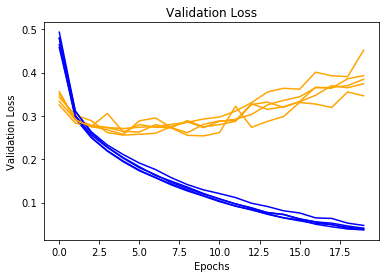

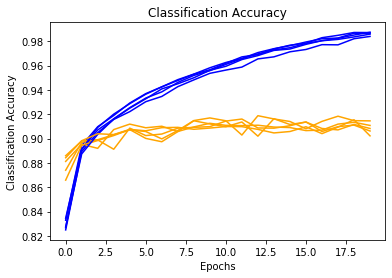

In [56]:
for i in range(len(histories)):
    # plot loss
    plt.title('Validation Loss')
    plt.plot(histories[i].history['loss'], color='blue', label='Training Loss')
    plt.plot(histories[i].history['val_loss'], color='orange', label='Testing Loss')
    plt.ylabel('Validation Loss')
    plt.xlabel('Epochs')
plt.show()
for i in range(len(histories)):
    # plot accuracy
    plt.title('Classification Accuracy')
    plt.plot(histories[i].history['accuracy'], color='blue')
    plt.plot(histories[i].history['val_accuracy'], color='orange')
    plt.ylabel('Classification Accuracy')
    plt.xlabel('Epochs')
plt.show()

### We can make individual prediction also by using the saved model

In [59]:
# We can save the model as 
def process_image(file_name):
    # load the image
    img = load_img(file_name, color_mode='grayscale', target_size=(28, 28))
    # convert to array
    img = img_to_array(img)
    # reshape into a single sample with 1 channel
    img = img.reshape(1, 28, 28, 1)
    # prepare pixel data (conversion to float and pixel value between 0 and 1)
    img = img.astype('float32') / 255.0
    return img
 
# load the image
img = process_image('image_1.png')
# load model
model = load_model('final_model.h5')
# predict the class
result = model.predict_classes(img)
# Prepare labels list
labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
print(labels[result[0]])

Pullover
